In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [12]:
df= pd.read_csv("data_for_classification.csv")
df = df.set_index(["product_name","code"])
df.head()

C:\Users\ohad1\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7,8,19,20,49) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,,category_name,B1 ויטמין,B6 ויטמין,סיבים תזונתיים,חומצה פולית,אנרגיה,חלבונים,פחמימות,שומנים,נתרן,...,K אשלגן,לחות,כרום,מוליבדן,בלתי רווי,חומצה לאורית,חומצה לינולאית,DHA,EPA,כלורופיל
product_name,code,,,,,,,,,,,,,,,,,,,,,
קלמנטינה,P_964560,פירות,0.09,0.08,1.7,24.0,47.0,9,12,0.2,1.0,...,0.0,0,0,0,0.0,0.0,0,0,0,0.0
תפוח עץ מוזהב,P_963136,פירות,0.00,0.00,2.4,0.0,52.0,0.3,13.8,0.2,1.0,...,0.0,0,0,0,0.0,0.0,0,0,0,0.0
לימון,P_964492,פירות,0.00,0.08,2.8,0.0,29.0,1.1,9.3,0.3,2.0,...,0.0,0,0,0,0.0,0.0,0,0,0,0.0
תפוז ברשת למיץ,P_964348,פירות,0.09,0.06,2.5,39.0,49.0,1,11.9,0.3,0.0,...,0.0,0,0,0,0.0,0.0,0,0,0,0.0
אבוקדו,P_964980,פירות,0.07,0.30,6.7,81.0,160.0,2,8.5,14.7,7.0,...,0.0,0,0,0,0.0,0.0,0,0,0,0.0


In [13]:
nulls = df.isna().sum()
print(nulls[nulls>0])
df['כלורופיל'] = df.fillna(value =0)

כלורופיל    3793
dtype: int64


In [14]:
print (df.shape)
df.info()

(9581, 98)
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 9581 entries, ('קלמנטינה', 'P_964560') to ('אבקה חלבון גו טעם שוקולד', 'P_7290110327606')
Data columns (total 98 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   category_name                   9581 non-null   object 
 1   B1 ויטמין                       9581 non-null   float64
 2   B6 ויטמין                       9581 non-null   float64
 3   סיבים תזונתיים                  9581 non-null   float64
 4   חומצה פולית                     9581 non-null   float64
 5   אנרגיה                          9581 non-null   object 
 6   חלבונים                         9581 non-null   object 
 7   פחמימות                         9581 non-null   object 
 8   שומנים                          9581 non-null   object 
 9   נתרן                            9581 non-null   float64
 10  B3 ויטמין                       9581 non-null   float64
 11  אשלגן             

In [15]:
#convert all the dataset to numeric, fill all the nulls with 0, and deletes columns filled only zeros
cols= df.columns[1:]
for col in cols:  
    df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.fillna(0)
df = df.loc[:, (df != 0).any(axis=0)]
df.shape

(9581, 92)

In [16]:
#in order to reduce background noise, drop the columns in which there are less than 10 products with this feature
df = df.reset_index()
arr = np.array([])
col_droped = np.array([])
cols= df.columns[1:]
for col in cols:
    if df[col].astype(bool).sum(axis=0)<50: #all the features that less than precent of the products have
        arr = np.append(arr, df[col].to_numpy().nonzero())
        col_droped = np.append(col_droped, col)
print("the number of the removed productes is ", len(set(arr)))

arr = set(arr) #all number of rows without duplicates
for i in arr:
    df = df.drop(i, axis=0)
df = df.loc[:, (df != 0).any(axis=0)] #deletes all columns with all values set to zero
df = df.set_index(['product_name','code'])
df.shape

the number of the removed productes is  324


(9257, 41)

In [7]:
x = df.drop('category_name',axis=1)
y = df['category_name']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,   random_state=42)

print (x_train.shape, x_test.shape)

(7405, 40) (1852, 40)


In [8]:
train_set = pd.concat([y_train,x_train], axis = 1)

בישול אפיה ושימורים      1500
חטיפים                   1449
חלב וביצים               1046
מזון מקורר                960
מוצרים לבישול ואפיה       277
לנמנעים מגלוטן            248
בישול                     221
לחם                       192
מוצרי מקרר וביצים         179
מן המקפיא                 178
בריאות במקרר              173
ללא גלוטן                 159
דגנים                     117
ויטמינים ותוספי תזונה     110
דיאט וללא סוכר            101
לתינוק- מזון               92
מאפים ועוגות מהמאפיה       85
ירקות                      82
ללא תוספת סוכר             63
פיצוחים ופירות יבשים       61
תינוקות וילדים             29
לחמים                      26
פירות וירקות אורגני        18
חיסול מלאי                 14
פירות                      11
בשר בקר וכבש                5
מוצרי עוף והודו             4
דגים                        4
ניקיון הבית וחד פעמי        1
Name: category_name, dtype: int64


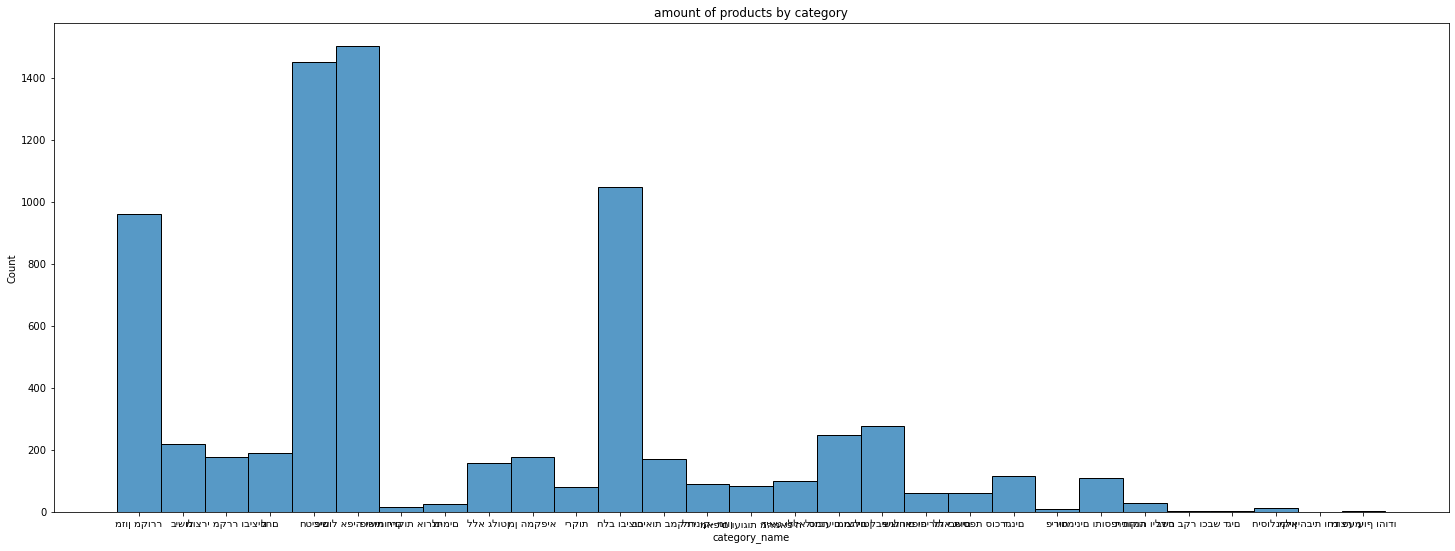

In [19]:
print (train_set['category_name'].value_counts())
plt.figure(figsize=(25,9))
sns.histplot(train_set[['category_name']], x = "category_name")
plt.title("amount of products by category")
plt.show()

In [61]:
scaler = StandardScaler()

products_arr_train = scaler.fit_transform(x_train) #scaler returns numpy array
scaled_products = pd.DataFrame(products_arr_train, index=x_train.index, columns=x_train.columns)

products_arr_test = scaler.transform(x_test)

scaled_products

,,B1 ויטמין,B6 ויטמין,סיבים תזונתיים,חומצה פולית,אנרגיה,חלבונים,פחמימות,שומנים,נתרן,B3 ויטמין,...,לקטוז,D ויטמין,קפאין,B12 ויטמין,שומן ללא טרנס,חומצות שומן רווי,סוכרוז,ביוטין,יוד,סלניום
product_name,code,,,,,,,,,,,,,,,,,,,,,
טורטליני פטריות,P_3989553,-0.03174,-0.313755,-0.022909,-0.558994,-0.456409,-0.569255,-0.479063,-0.133256,-0.198470,-0.09447,...,-0.051053,-0.059349,-0.036012,-0.032349,-0.030307,-0.074182,-0.013115,-0.020513,-0.045161,-0.016747
מיקס אורז אפונה ועדשים,P_7290017325316,-0.03174,2.124248,-0.022909,1.424370,-0.307650,1.891705,-0.342691,-0.133256,-0.198470,-0.09447,...,-0.051053,-0.059349,-0.036012,-0.032349,-0.030307,-0.074182,-0.013115,-0.020513,-0.045161,-0.016747
סחוג ירוק,P_7296073396918,-0.03174,-0.313755,-0.022909,-0.558994,-0.456409,-0.569255,-0.479063,-0.133256,-0.198470,-0.09447,...,-0.051053,-0.059349,-0.036012,-0.032349,-0.030307,-0.074182,-0.013115,-0.020513,-0.045161,-0.016747
אונלי מעדן תות,P_7290112348944,-0.03174,-0.313755,-0.004705,-0.558994,0.394824,-0.469655,0.344850,-0.131758,-0.165505,-0.09447,...,-0.051053,-0.059349,-0.036012,-0.032349,-0.030307,-0.074182,-0.013115,-0.020513,-0.045161,-0.016747
לחם שיפון קל,P_7290013027535,-0.03174,-0.313755,-0.022909,-0.558994,-0.456409,-0.569255,-0.479063,-0.133256,-0.198470,-0.09447,...,-0.051053,-0.059349,-0.036012,-0.032349,-0.030307,-0.074182,-0.013115,-0.020513,-0.045161,-0.016747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
בונבוניירה פררו רושה,P_8000500037874,-0.03174,-0.313755,-0.022909,-0.558994,-0.456409,-0.569255,-0.479063,-0.133256,-0.198470,-0.09447,...,-0.051053,-0.059349,-0.036012,-0.032349,-0.030307,-0.074182,-0.013115,-0.020513,-0.045161,-0.016747
קוואקר אנגלי,P_2842002,-0.03174,-0.313755,-0.022909,-0.558994,-0.456409,-0.569255,-0.479063,-0.133256,-0.198470,-0.09447,...,-0.051053,-0.059349,-0.036012,-0.032349,-0.030307,-0.074182,-0.013115,-0.020513,-0.045161,-0.016747
ביצי הפתעה LOL,P_7296073388531,-0.03174,-0.313755,-0.022909,-0.558994,-0.456409,-0.569255,-0.479063,-0.133256,-0.198470,-0.09447,...,-0.051053,-0.059349,-0.036012,-0.032349,-0.030307,-0.074182,-0.013115,-0.020513,-0.045161,-0.016747


## Logistic regression

In [111]:
logreg = LogisticRegression(solver='liblinear').fit(products_arr_train, y_train)
logreg_score = cross_val_score(logreg, products_arr_train, y_train, cv=10, scoring='accuracy').mean()
print(logreg_score)

C:\Users\ohad1\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


0.5593513148776307


## KNN

In [134]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, products_arr_train, y_train, cv=10, scoring='accuracy')
print(scores,"\n")
print("mean score of knn combined with cross validation is: ", scores.mean())

C:\Users\ohad1\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


[0.62213225 0.60323887 0.60863698 0.60728745 0.61403509 0.58378378
 0.59189189 0.41756757 0.62702703 0.61891892] 

mean score of knn combined with cross validation is:  0.5894519823467191


In [91]:
k_range = list(range(1, 21))
knn_best_score = 0
k_best = 0
k_scores = np.array([])
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, products_arr_train, y_train, cv=10, scoring='accuracy').mean()
    k_scores = np.append(k_scores,scores)
    if (scores>knn_best_score):
        knn_best_score=scores
        k_best=k
print("The best k neighbors  is: ",k_best,"the accepted score: ", knn_best_score)

C:\Users\ohad1\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\ohad1\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\ohad1\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\ohad1\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\ohad1\anaconda3\lib\site-packag

The best k neighbors  is:  6 the accepted score:  0.6075589962432068


Text(0, 0.5, 'Cross-Validated Accuracy')

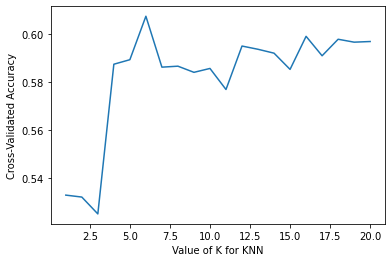

In [92]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [109]:
knn=KNeighborsClassifier()
k_range = list(range(1,31))
weight_options = ['uniform', 'distance']
metrics_options = ['euclidean', 'manhattan']
param_grid = dict(n_neighbors=k_range, weights=weight_options, metric=metrics_options)
grid=GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(products_arr_train, y_train)
print(grid.best_index_)
print(grid.best_params_)

C:\Users\ohad1\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


105
{'metric': 'manhattan', 'n_neighbors': 23, 'weights': 'distance'}


In [110]:
grid.best_score_

0.6174196666301929

In [112]:
knn=KNeighborsClassifier()
k_range = list(range(1,31))
weight_options = ['uniform', 'distance']
metrics_options = ['euclidean', 'manhattan']
param_grid = dict(n_neighbors=k_range, weights=weight_options, metric=metrics_options)
grid=GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(x_train, y_train)
print(grid.best_score_)
print(grid.best_params_)

C:\Users\ohad1\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


0.6075628259838786
{'metric': 'manhattan', 'n_neighbors': 23, 'weights': 'distance'}


## Random forest

In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier(random_state=12)
rfc.fit(products_arr_train, y_train)
param_grid = { 
    'n_estimators': [50,100,150],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [5, 10, 20, 25],
    'criterion' :['gini', 'entropy']
}
rfc_grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10, scoring='accuracy')
rfc_grid.fit(products_arr_train, y_train)
print(rfc_grid.best_score_)
print(rfc_grid.best_params_)

C:\Users\ohad1\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


0.6468592479118794
{'criterion': 'entropy', 'max_depth': 25, 'max_features': 'log2', 'n_estimators': 100}


In [119]:
first_try_x = x_test.iloc[:500,:]
first_try_y = y_test.iloc[:500]

final_try_x = x_test.iloc[501:,:]
final_try_y = y_test.iloc[501:]

In [140]:
rfc = RandomForestClassifier(criterion= 'entropy', max_depth= 25, max_features= 'log2', n_estimators= 100,random_state=50)
rfc.fit(products_arr_train, y_train)
predict = rfc.predict(first_try_x)
rfc.score(first_try_x, first_try_y)

0.254